# Dataset Retrieval part

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7ufxR2lDM6t7uUTFvvdT")
project = rf.workspace("pothole-ipd").project("ipd-pothole-detection-2")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a434ee2aeede852810c3e74457ef7f97cdd5e42707d26c40093a6bec1eb31d11
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.

Extracting Dataset Version Zip to IPD-Pothole-Detection-2-2 in yolov8:: 100%|██████████| 13572/13572 [00:04<00:00, 2988.48it/s]


In [3]:
!pip install torch torchvision

In [4]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 14562, done.
remote: Counting objects: 100% (693/693), done.
remote: Compressing objects: 100% (438/438), done.
remote: Total 14562 (delta 413), reused 453 (delta 255), pack-reused 13869
Receiving objects: 100% (14562/14562), 8.31 MiB | 20.51 MiB/s, done.
Resolving deltas: 100% (9889/9889), done.
/content/ultralytics


In [5]:
!ls

CITATION.cff	 docs	   MANIFEST.in	README.zh-CN.md   setup.py
CONTRIBUTING.md  examples  mkdocs.yml	requirements.txt  tests
docker		 LICENSE   README.md	setup.cfg	  ultralytics


In [6]:
!pip install -r requirements.txt

# YOLO V8 Training

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 81.4MB/s]


In [9]:
model.train(data="/content/IPD-Pothole-Detection-2-2/data.yaml", epochs=5)  # train the model

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/IPD-Pothole-Detection-2-2/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=

In [17]:
import torch
save_path = "/content/drive/MyDrive/YOLOv8/asdf.pt"
# model.model.save_weights(save_path)
# model.export(save_path)
torch.save(model.model.state_dict(), save_path)

In [30]:
MODEL_PATH = '/content/ultralytics/runs/detect/train2/weights/best.pt'

In [31]:
best_model = YOLO(MODEL_PATH)


In [32]:
metrics = best_model.val()

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients
val: Scanning /content/IPD-Pothole-Detection-2-2/valid/labels.cache... 669 images, 0 backgrounds, 0 corrupt: 100%|██████████| 669/669 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1789, len(boxes) = 1823. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:13<00:00,  3.12it/s]
                   all        669       1823      0.915      0.412      0.447      0.305
               Pothole        669       1805       0.83      0.823      0.879      0.607
                object        669         18          1          0     0.0143    0.00236
Speed: 1.5ms pr

# Results

In [33]:
results = best_model("/content/IPD-Pothole-Detection-2-2/test/images/Pothole-damage_jpg.rf.47991d77cc29df1852547a37e79dfe60.jpg")


image 1/1 /content/IPD-Pothole-Detection-2-2/test/images/Pothole-damage_jpg.rf.47991d77cc29df1852547a37e79dfe60.jpg: 640x640 11 Potholes, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


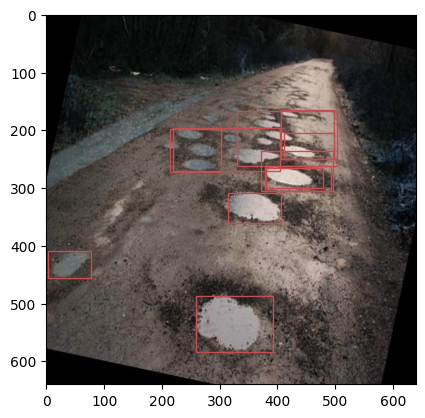

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Access the original image
img = results[0].orig_img

fig, ax = plt.subplots(1)
ax.imshow(img)

# Get bounding boxes
boxes = results[0].boxes.xyxy.cpu()

# Iterate over the bounding boxes and plot them
for box in boxes:
    x1, y1, x2, y2 = box
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()
